In [1]:
import matplotlib.pyplot as plt
import matplotlib as cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline


## Create random Data points 

In [2]:
def make_data(N):
    r = np.random.RandomState(1)
    x = r.rand(N,1)**4  #single uniformly distributed random number in the interval 
    y = -1/(x.ravel()+0.1) + (1*r.randn(N)) #ravel() Return a contiguous flattened array. A 1-D array
    return x,y

X,Y = make_data(100)
print(X,X.shape)
print(Y,Y.shape)

[[3.02437672e-02]
 [2.69223354e-01]
 [1.71128228e-16]
 [8.35487119e-03]
 [4.63854925e-04]
 [7.26997712e-05]
 [1.20359498e-03]
 [1.42592773e-02]
 [2.47824507e-02]
 [8.42877189e-02]
 [3.08789386e-02]
 [2.20454443e-01]
 [1.74730039e-03]
 [5.94580146e-01]
 [5.62620398e-07]
 [2.02074238e-01]
 [3.03258883e-02]
 [9.74278365e-02]
 [3.88424678e-04]
 [1.54010723e-03]
 [4.11127007e-01]
 [8.78963399e-01]
 [9.65005932e-03]
 [2.29738655e-01]
 [5.89913009e-01]
 [6.40513835e-01]
 [5.23093150e-05]
 [2.32646716e-06]
 [8.31882389e-04]
 [5.94648041e-01]
 [9.35495131e-05]
 [3.14465077e-02]
 [8.41902319e-01]
 [8.08067159e-02]
 [2.29147889e-01]
 [9.91022508e-03]
 [2.22108160e-01]
 [4.85251577e-01]
 [1.11864220e-07]
 [3.16649852e-01]
 [9.56183295e-01]
 [3.13322130e-01]
 [6.18563888e-03]
 [3.88081477e-01]
 [1.13541991e-04]
 [4.02438147e-02]
 [6.81525848e-01]
 [7.43203791e-03]
 [6.85826551e-03]
 [2.85861175e-04]
 [1.40684299e-07]
 [2.12352935e-01]
 [2.00582695e-03]
 [4.97236922e-03]
 [5.83919053e-02]
 [8.108604

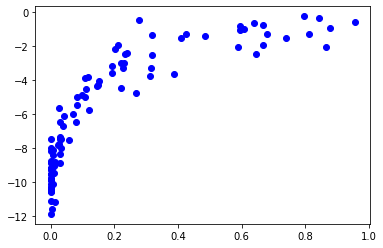

In [3]:
plt.scatter(X.ravel(),Y,color='blue', label='Data')
plt.show()

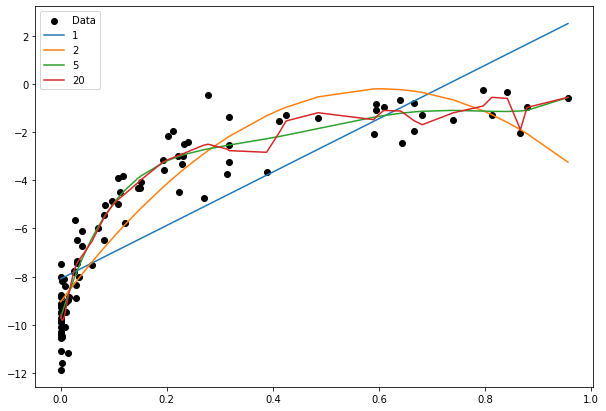

In [4]:
fig = plt.figure(figsize=(10,7))
plt.scatter(X.ravel(),Y,color='black', label='Data')

axis = plt.axis()
for degree in [1,2,5,20]: #20: even take noise into account. much complex
    poly_features = PolynomialFeatures(degree = degree, include_bias= False)
    x_poly = poly_features.fit_transform(X) # add polynomial features x,x^2
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly,Y)
    predicted = lin_reg.predict(x_poly)
    
    plt.plot(np.sort(X.ravel()),predicted[np.argsort(X.ravel())],label=str(degree))
    
plt.legend()

In [5]:
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression()) #pipelining to do first and next

## For K Fold 

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
cross_val_score(PolynomialRegression(),X,Y,cv=5)  #k=5, return the values so that we should get the mean score from the list

array([0.8269253 , 0.9233022 , 0.7996689 , 0.89632889, 0.75301407])

## For validation curve

In [8]:
from sklearn.model_selection import validation_curve

Text(0, 0.5, 'score')

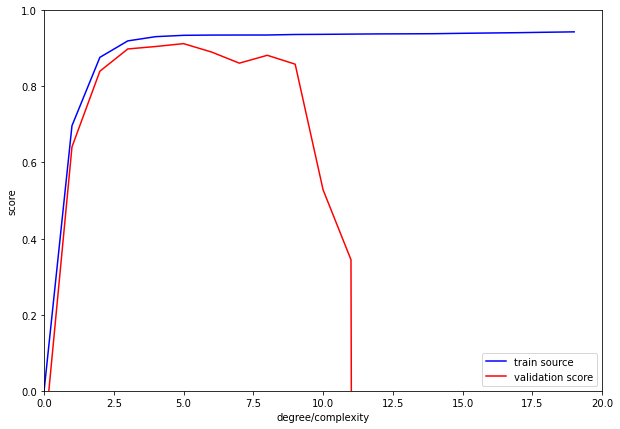

In [10]:
fig = plt.figure(figsize=(10,7))

degree = np.arange(0,20)

train_score, validation_score = validation_curve(PolynomialRegression(),X,Y,param_name='polynomialfeatures__degree',param_range=degree,cv=5)
plt.plot(degree, np.mean(train_score,1),color="blue",label='train source') #axis = 0 means along the column and axis = 1 means working along the row.
plt.plot(degree, np.mean(validation_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlim(0,20)
plt.xlabel('degree/complexity')
plt.ylabel('score')

In [13]:
print(train_score, train_score.shape)
print(validation_score,validation_score.shape)
print(np.mean(validation_score,1))

[[0.         0.         0.         0.         0.        ]
 [0.69790623 0.65598172 0.69951465 0.70209385 0.72779687]
 [0.87717953 0.85639894 0.88805846 0.86687721 0.89296872]
 [0.92087964 0.90779696 0.92805122 0.91228776 0.92867481]
 [0.92889125 0.92028259 0.93836358 0.9259679  0.9398105 ]
 [0.93048347 0.92347942 0.94103255 0.93409187 0.94185705]
 [0.93049223 0.92348295 0.94355893 0.93477882 0.94192   ]
 [0.93049968 0.92384804 0.9436812  0.93480478 0.94200796]
 [0.93062359 0.9238492  0.94369848 0.93493964 0.94201391]
 [0.93121316 0.92565341 0.943704   0.93851961 0.94282213]
 [0.9316752  0.92636204 0.94406194 0.93897305 0.94283112]
 [0.93277698 0.92813348 0.94406538 0.93907512 0.94283294]
 [0.93304345 0.92828034 0.94516959 0.93955367 0.94348346]
 [0.93305271 0.92828585 0.94552765 0.94025486 0.94351241]
 [0.9331339  0.92856692 0.94669378 0.94028325 0.94369681]
 [0.93510241 0.93022813 0.94678822 0.94076112 0.94465281]
 [0.93706748 0.93062129 0.94820006 0.94087323 0.94484693]
 [0.9377586  0

## For Grid Search 

In [15]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid= {'polynomialfeatures__degree': np.arange(20),
            'linearregression__fit_intercept': [True,False],
            'linearregression__normalize':[True,False]}

grid = GridSearchCV(PolynomialRegression(),param_grid,cv=7)

In [22]:
grid.fit(X,Y)

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155:

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155:

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155:

c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
c:\users\vidur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:155:

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [24]:
grid.best_params_   #so that we can find the best parameters 

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 5}

## Learning Curve 

In [25]:
from sklearn.model_selection import learning_curve

In [44]:
train_sizes,train_errors,validation_errors = learning_curve(estimator=PolynomialRegression(5),
                                                            X=X,y=Y,cv=7,scoring='neg_mean_squared_error',
                                                            train_sizes= np.linspace(0.01,1,10))

In [45]:
train_error_mean = -np.mean(train_errors,axis=1)
validation_error_mean = -np.mean(validation_errors,axis =1)

print('Mean Training error \n\n',pd.Series(train_error_mean,index= train_sizes))
print('\n')
print('Mean Validation error \n\n',pd.Series(validation_error_mean,index=train_sizes))

Mean Training error 

 1    -0.000000
10    0.129348
19    0.226794
28    0.397548
38    0.549205
47    0.551222
56    0.613410
66    0.708718
75    0.663789
85    0.790852
dtype: float64


Mean Validation error 

 1     1.816548e+01
10    1.524190e+12
19    3.178815e+05
28    1.270310e+00
38    1.092272e+00
47    1.020245e+00
56    9.515532e-01
66    9.656651e-01
75    9.717763e-01
85    9.636005e-01
dtype: float64


(0.0, 6.0)

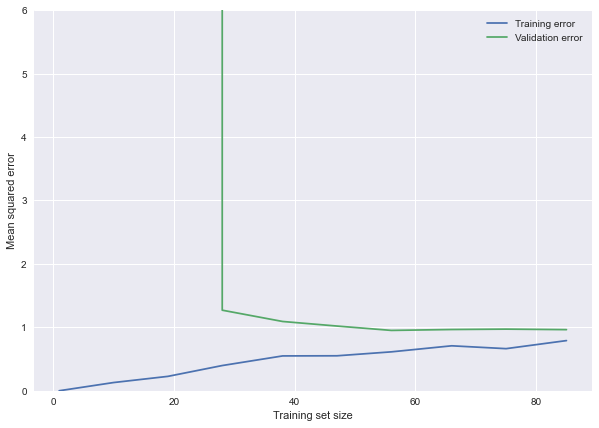

In [46]:
fig= plt.figure(figsize=(10,7))

plt.style.use('seaborn')

plt.plot(train_sizes,train_error_mean,label='Training error')
plt.plot(train_sizes, validation_error_mean,label='Validation error')

plt.ylabel('Mean squared error')
plt.xlabel('Training set size')
plt.legend()
plt.ylim(0,6)